## Foundation of Data Science Assigment- Navaneeth Joshi (21021287)

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1: Import the data as of the Excel file "winequality-red.cvs". Subsequently, write the code that displays the number of rows and columns in your imported data sample. [1 Mark]

In [13]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

### As printed above, the dataset has 1599 rows and 12 columns 

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Task 2: Write the code and type in the answer to the question “which are the three top independent (feature) variables with the least spread of data values?”. [1 Mark]

In [15]:
np.std(df)
##density,chlorides,pH

fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64

### The three top independent feature variables with the least spread of data values are Density, chlorides and pH.

#### Task 3: Write the code to generate and display the correlation matrix among all 12 variables (feature and target variables). Subsequently, answer the question about the top three feature variables, which appear to have the strongest correlation with the target variable “quality”. [3 Marks]

In [16]:
corrMatrix = df.corr()
print(corrMatrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

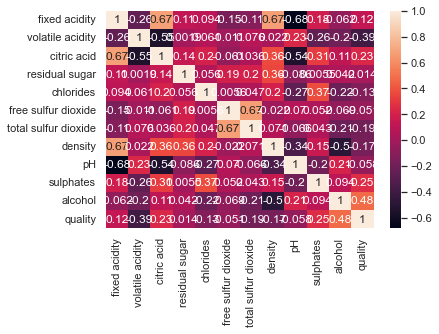

In [17]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
print(corrMatrix['quality'].sort_values (ascending = False),'\n') 


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64 



### The top three variables with highest correlation with the feature variable(Quality) are Alcohol, Sulphates and Citric Acid

#### Task 4: Write the code to examine which variables do follow the normal (Gaussian) distribution. Subsequently, provide and justify your answer based on your observations. [3 Marks]

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

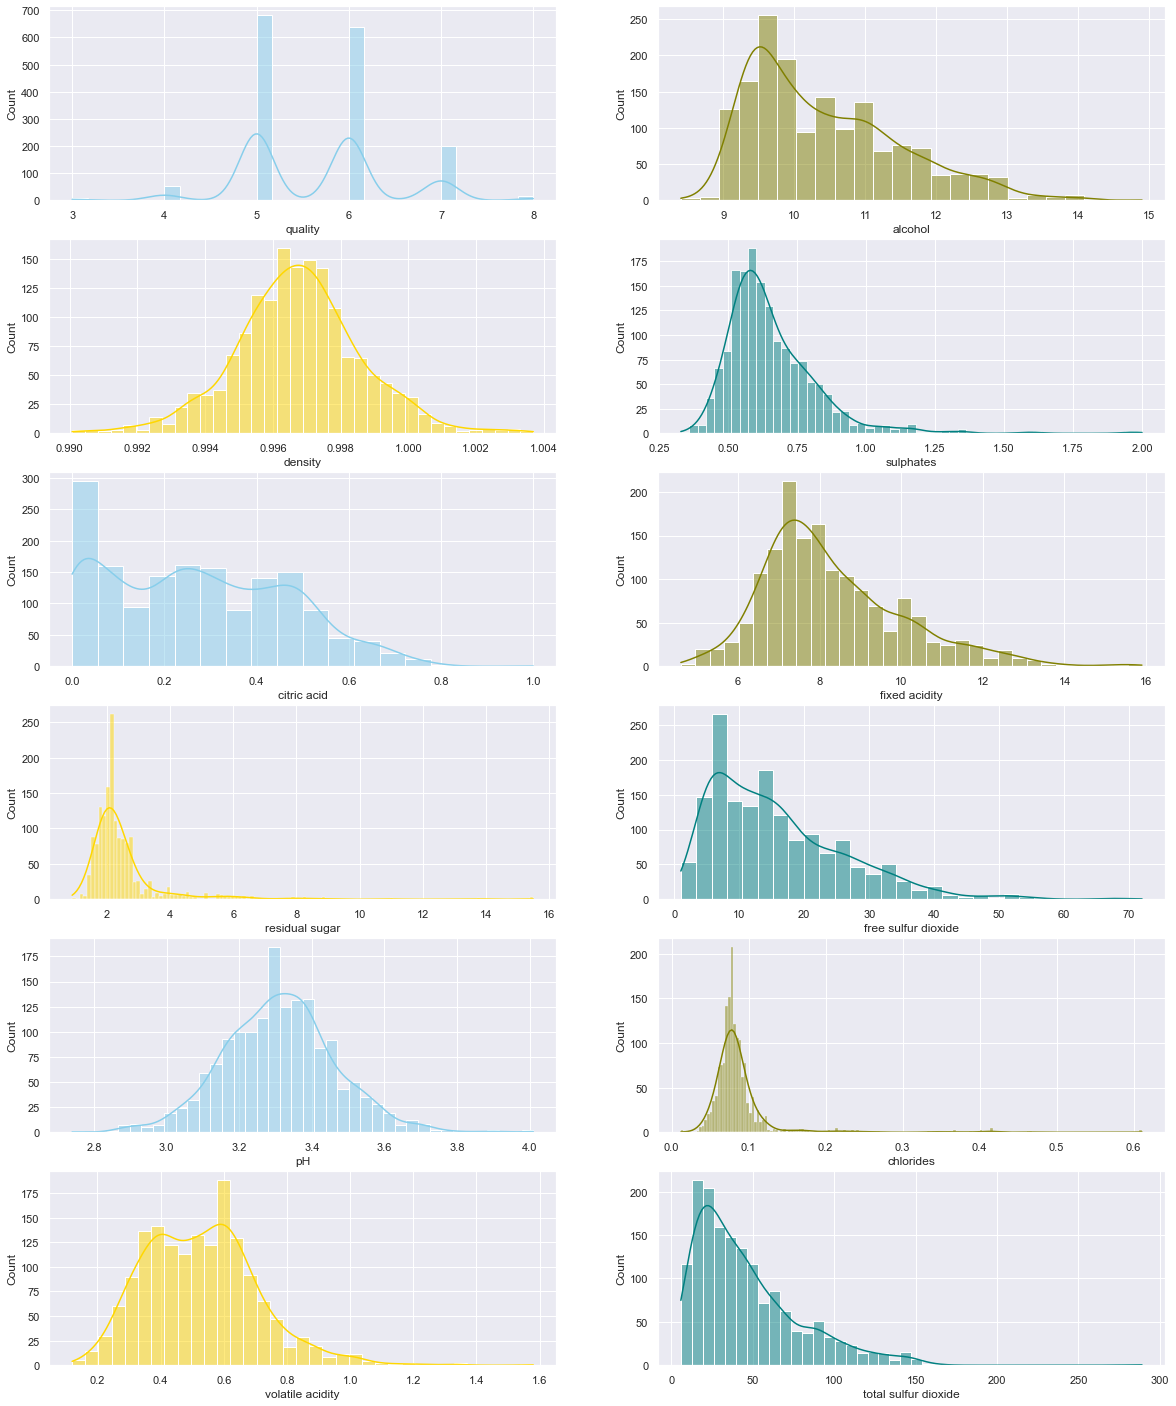

In [19]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(6, 2, figsize=(20, 25))

sns.histplot(data=df, x="quality", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="alcohol", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="density", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="sulphates", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="citric acid", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="fixed acidity", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="residual sugar", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df, x="free sulfur dioxide", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=df, x="pH", kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=df, x="chlorides", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=df, x="volatile acidity", kde=True, color="gold", ax=axs[5, 0])
sns.histplot(data=df, x="total sulfur dioxide", kde=True, color="teal", ax=axs[5, 1])


### As we can see from the plot, most of the plots are not normal distribution except density and pH. 
features like density and pH have bell shaped curves, so they are normally distributed


#### Task 5: Modify the given code such that a Principal Component Analysis (PCA) is carried out for all feature (independent) variables. Subsequently, draw a Scree plot to explain the ratio of variance as well as modify the given code to answer the question “which feature variables mostly contribute to the observed variance distribution by more than 30%”. [5 Marks]

In [20]:
from sklearn.decomposition import PCA

In [21]:
X_1 = df.drop('quality',axis=1)
X_1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [22]:
Y_1=df['quality']

In [23]:
#Analysis of PCA1, PCA2- The principal components
pca = PCA()
val = X_1.values
pca.fit(val)
pca_component= pca.transform(val)

Text(0, 0.5, 'PC 2')

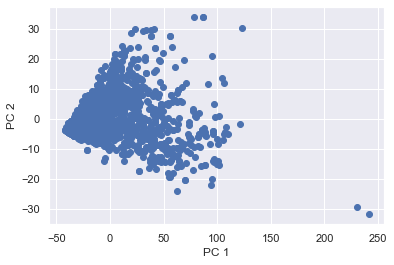

In [24]:
ax = plt.gca()
ax.scatter(pca_component[:,0], pca_component[:,1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

[Text(0, 0, 'PC1'),
 Text(1, 0, 'PC2'),
 Text(2, 0, 'PC3'),
 Text(3, 0, 'PC4'),
 Text(4, 0, 'PC5'),
 Text(5, 0, 'PC6'),
 Text(6, 0, 'PC7'),
 Text(7, 0, 'PC8'),
 Text(8, 0, 'PC9'),
 Text(9, 0, 'PC10'),
 Text(10, 0, 'PC11')]

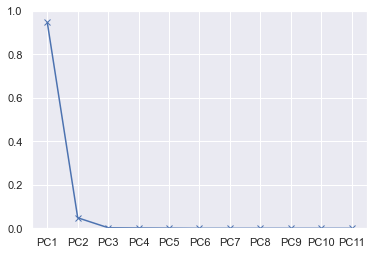

In [25]:
#Scree visualisation before normalize
ax = plt.gca()
ax.set_ylim(0,1.)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
var1 = pca.explained_variance_ratio_
ax.plot(var1, marker='x')
ax.set_xticklabels(["PC{}".format(i) for i in range(1,12)])

In [27]:
X_feature_names = X_1.columns
X_feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

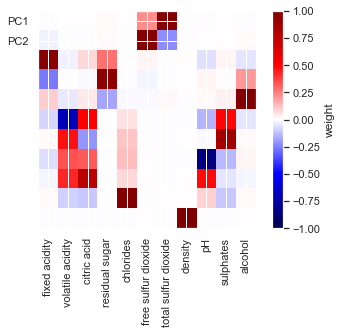

In [28]:
comps = pca.components_
ax = plt.gca()
img = ax.imshow(comps, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(img, label="weight")
ax.set_yticks([0,1])
t = ax.set_yticklabels(["PC{}".format(i+1) for i in range(2)])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
t = ax.set_xticklabels(X_feature_names, rotation=90)

In [29]:
print(np.array(X_feature_names)[np.where(pca.components_[0,:] > 0.3)[0]])

['total sulfur dioxide']


### Total sulfur dioxide contributes to observed variance distribution by more than 30%


#### Task 6: Write/modify the code to repeat task 5, this time, however, this time with normalized values across all feature variables. Explain the observed differences and answer again the question: Which feature variables mostly contribute to the observed variance distribution by more than 30%? [5 Marks]

In [30]:
#Normalize feature variables
from sklearn import preprocessing as pp

In [33]:
ss = pp.StandardScaler()
ss.fit(X_1.values)
pca_norm = PCA()
pca_norm.fit(ss.transform(X_1.values))
wines_pca_norm = pca_norm.transform(ss.transform(X_1.values))

Text(0, 0.5, 'PCA 2')

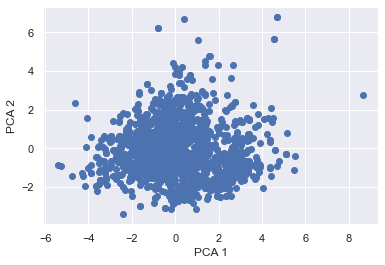

In [34]:
ax2 = plt.gca()
ax2.set_xlabel('PCA 1')
ax2.scatter(wines_pca_norm[:,0], wines_pca_norm[:,1])
ax2.set_ylabel('PCA 2')

In [35]:
print(np.array(X_feature_names)[np.where(pca_norm.components_[0,:] > 0.3)[0]])

['fixed acidity' 'citric acid' 'density']


### Features like 'fixed acidity' 'citric acid' 'density' mostly contribute to the observed variance distribution by more than 30%

#### Task 7: Write/modify the code to calculate the following two empirical probabilities (e.g., all 1599 rows as sample data): a) Probability of red wine quality to be less than 5, i.e., P(X<5), b) Probability of red wine quality to be equal or greater than 8, i.e., P(X ≥ 8), X = “quality”. [4 Marks]

In [36]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

In [37]:
ecdf = ECDF(df[ 'quality' ])
print('P(X<5): %.3f' % ecdf(4))
print ('P(X>=8) : %.3f' % (1-ecdf(7)))

P(X<5): 0.039
P(X>=8) : 0.011


#### Quality of wine score less than 5 probability-> 0.039
#### Quality of wine score greater or equal to 8 probability-> 0.011

#### Task 8: Let us assume that French wine makers and producers claim that it is possible to produce next year 1,000,000 bottles of red wines, to be considered as a population, a) with an average of quality equal or greater than 7, b) the distribution of quality scores will not be equal. Write the code, which states the Null (Ho) and alternative (H1) hypotheses such that you either reject or accept these two claims, (a) and (b), with confidence values 98% and 95%, respectively, on the basis of evidence provided by your 1599 large sample data. [6 Marks]

In [38]:
df['quality'].mean()

5.6360225140712945

In [39]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [40]:
import math

In [41]:

sample_size=50
wine_sample=np.random.choice(df['quality'], sample_size)


In [42]:
wine_sample


array([6, 6, 5, 5, 4, 6, 6, 5, 5, 6, 5, 5, 7, 7, 5, 7, 6, 6, 5, 7, 5, 6,
       5, 6, 5, 5, 6, 4, 7, 5, 3, 6, 7, 5, 5, 5, 6, 4, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 6], dtype=int64)

### T-test

In [43]:

from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(wine_sample, 7,alternative='less')
print(p_value)

4.223909016749241e-17


In [44]:
#95% confidence interval
# alpha value is 0.05 or 5% 
if p_value < 0.05:
  print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [45]:
#98% confidence interval
# alpha value is 0.02 or 2% 
if p_value < 0.02:
  print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


#### p-value is less than the alpha values in both cases, we can reject the null hypothesis that the average is greater than or equal to 7

#### Task 9: Let us assume that you have a first attempt at estimating a simple linear regression model with all 11 predictor (feature) variables predicting the quality of red wine (target variable). The model should take the form: y = a + b1X1 + b2X2+….+b11X11, with a being the intercept and b1,…b11, the co-efficients. Assuming also that the values of the predictor variables are normalised, write the code, which will deliver an estimate of this model, i.e., intercept and coefficients, as well as an estimate of how fit is the model in terms of metrics such as R-square and the Mean Squared Error. [6 Marks]

In [46]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X_1)

In [47]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using different variables as predictors of quality
# Split data into predictors X and output Y
predictors = ['fixed acidity', 'density', 'citric acid', 'chlorides', 'free sulfur dioxide', 'volatile acidity', 'pH', 'alcohol', 'sulphates', 'residual sugar', 'total sulfur dioxide']
X = df[predictors]
y = df['quality']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)
y_pred=model.predict(X)

In [48]:
# model evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y,y_pred)
  
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(mse,r2)

0.4167671672214082 0.3605517030386879


In [49]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 21.965208449448845
betas = [ 2.49905527e-02 -1.78811638e+01 -1.82563948e-01 -1.87422516e+00
  4.36133331e-03 -1.08359026e+00 -4.13653144e-01  2.76197699e-01
  9.16334413e-01  1.63312698e-02 -3.26457970e-03]


#### Task 10: Based on the result of task 9, you make now an attempt to improve your linear regression model by turning it into a polynomial expression, i.e., adding as parameters squared variables and/or their combinations. For instance, your model should take the form: y = a +b1X1 + b1X12 + b2X1X2 + ….+error. Write/modify the code such that different degrees up to 5 are tried out. In your attempts, you may opt for suppressing the Intercept. Subsequently, state your observations on how the performance of these models is improved in terms of the R-square metric. Finally, explain whether an improved performance, as measured by the R-square metric, can be trusted and suggest ways to prove this trust. [6 Marks]

In [50]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [52]:
for n in range(2,6):
    poly = PolynomialFeatures(degree=n)
    polyX_train =poly.fit_transform(X_train)
    polyX_test = poly.transform(X_test)

    lm.fit(polyX_train,y_train)
    test_pred=lm.predict(polyX_test)
    
    r2 = r2_score(y_test,test_pred)
    print(f'For degree {n}, r-square metric={r2}')

For degree 2, r-square metric=0.33141317564185513
For degree 3, r-square metric=-0.6718018989147683
For degree 4, r-square metric=-29029.028312844766
For degree 5, r-square metric=-129134.27755451486


#### The r-square metric for degree 3 and 4 indicates underfitting
#### Since the rscore is really low, the model performance is poor as the variation of dependent variable in not being explained by the independent variables in this model. 
#### Adding more non-correlated independent variables to the model, variables that some how relate to the dependent variable could improve the performance of the model
#### r-square won't provide info on how good the fit is, Moreover rsquare value won't go down much even if irrelevant features are added.
#### we can improve this trust by using Kfold cross validation